# Test differentation

Set up simple loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
%matplotlib inline

In [2]:
from geometry import *

In [3]:
theta = np.linspace(-0.323*np.pi, 0.323*np.pi, 1000)
x0 = np.sinh(theta)
x1 = np.cosh(theta)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])

In [4]:
target = np.array([0., 1.])
initial_point = np.array([np.sinh(0.9), np.cosh(0.9)])

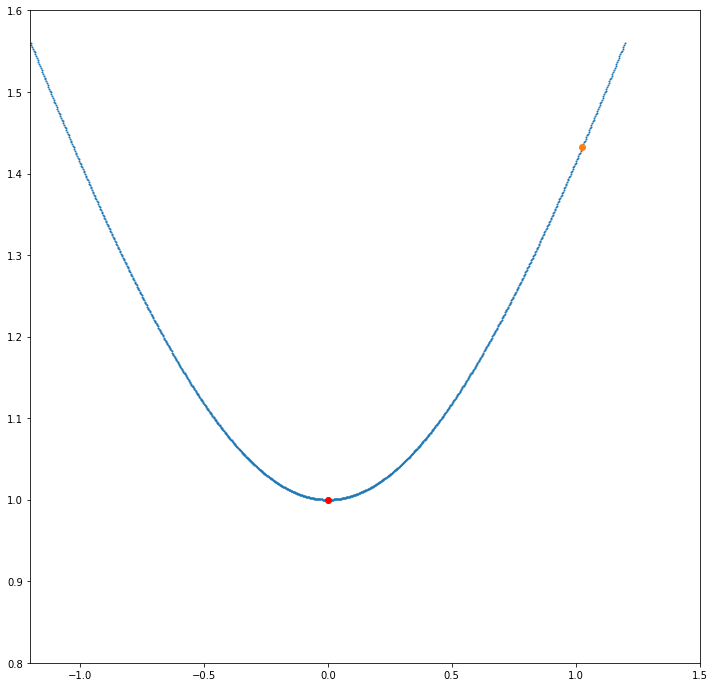

In [5]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.5], ylim=[0.8, 1.6])
ax.scatter(x0, x1, s=1)
ax.scatter(target[0], target[1], color='r')
ax.scatter(initial_point[0], initial_point[1])

In [6]:
def error_differential_eucl(u, v, geometry="hyperbolic"):
    '''
        Calculate differential of distance between points u and v, accounting for different
        geometries by implementing an appropriate metric.
        Inputs:
            u: (d+1)-dimensional vector, expressed in ambient space coordinates
            v: (d+1)-dimensional vector, expressed in ambient space coordinates
            geometry: specifies which metric to use (and hence how inner product calculated)
        Outputs:
            gradient of the distance in (d+1)-dimensional ambient space coordinates
    '''
    # If u and v are identical, the gradient should be zero
  # if np.array_equal(u, v):
  #      return np.zeros(u.shape)
    
    # If u and v are different, calculate the gradient
    metric = get_metric(u.shape[0], geometry)
    print("u = {}, v = {}, u.v = {}".format(u, v, dot(u, v, geometry)))
    if geometry == "spherical":
        coeff = -1./np.sqrt(1.-dot(u, v, geometry)**2)
    if geometry == "hyperbolic":        
        coeff = -1./np.sqrt(dot(u, v, geometry)**2-1.)
    print("coefficient*2*u*metric.dot(v)= {:.4g}*2*{}*{}.dot({})".format(
            coeff, u, metric, v)
         )
    return coeff*2*u*metric.dot(v)
    #return coeff*2*u*v

In [7]:
def gradient_descent(pt_i, target, differential_fn, geometry="hyperbolic", learning_rate=1.):
    '''
        Calculate local gradient of differential, given the current pt and the target.
        Inputs:
                Two (d+1)-dimensional vectors in ambient space co-ordinates, pt_i and target
                pt_i: (d+1)-dimensional vector in ambient space co-ordinates,
                       the point to evaluate the gradient at.
                target: (d+1)-dimensional vectors in ambient space co-ordinates, the target point
                differential_fn: function that calculates the derivative
                learning_rate: dictates how far to step in gradient direction
    '''
    # Calculate gradient in ambient space co-ordinates
    step = differential_fn(pt_i, target, geometry)
    print("step =",step)
    # Project this gradient onto tangent space
    projection = project_to_tangent(pt_i, step, geometry)
    print("projection on tangent space = ",projection)
    # Map to manifold and return this updated pt
    return exponential_map(learning_rate*projection, pt_i, geometry)

In [8]:
def error_differential_eucl_2(u, v, geometry="hyperbolic"):
    '''
        Calculate differential of distance between points u and v, **with respect to u** accounting for different
        geometries by implementing an appropriate metric.
        Inputs:
            u: (d+1)-dimensional vector, expressed in ambient space coordinates
            v: (d+1)-dimensional vector, expressed in ambient space coordinates
            geometry: specifies which metric to use (and hence how inner product calculated)
        Outputs:
            gradient of the distance in (d+1)-dimensional ambient space coordinates
    '''
    # If u and v are identical, the gradient should be zero
  # if np.array_equal(u, v):
  #      return np.zeros(u.shape)
    
    # If u and v are different, calculate the gradient
    metric = get_metric(u.shape[0], geometry)
    print("u = {}, v = {}, u.v = {}".format(u, v, dot(u, v, geometry)))
    if geometry == "spherical":
        coeff = -1./np.sqrt(1.-dot(u, v, geometry)**2)
    if geometry == "hyperbolic":        
        coeff = -1./np.sqrt(dot(u, v, geometry)**2-1.) 
    print("metric.dot(v)*coefficient=")
    print("{}.dot({})*{}".format(
            metric, v, coeff)
         )
    return coeff*metric.dot(u)
    #return coeff*u

In [9]:
updated_pts = [initial_point]
for i in range(1,18):
    updated_pts.append(
        gradient_descent( 
                         updated_pts[i-1], 
                         target,
                         error_differential_eucl_2, 
                         geometry="hyperbolic", 
                         learning_rate=0.04
                        )
    )
    print("updated_pt = ", updated_pts[i])
    print("-"*80)
print(updated_pts)


u = [1.02651673 1.43308639], v = [0. 1.], u.v = -1.4330863854487743
metric.dot(v)*coefficient=
[[ 1.  0.]
 [ 0. -1.]].dot([0. 1.])*-0.9741682477800039
step = [-1.          1.39606725]
point_on_manifold = [1.02651673 1.43308639], displacement = [-1.          1.39606725]
xp_norm = -3.0272016991963544, xx_norm = -1.0
projection on tangent space =  [-4.10747318 -2.94217429]
updated_pt =  [0.86861126 1.32456994]
--------------------------------------------------------------------------------
u = [0.86861126 1.32456994], v = [0. 1.], u.v = -1.324569935919965
metric.dot(v)*coefficient=
[[ 1.  0.]
 [ 0. -1.]].dot([0. 1.])*-1.1512629986867038
step = [-1.          1.52492836]
point_on_manifold = [0.86861126 1.32456994], displacement = [-1.          1.52492836]
xp_norm = -2.8884855119451758, xx_norm = -0.9999999999999997
projection on tangent space =  [-3.50897103 -2.30107271]
updated_pt =  [0.73287085 1.23979824]
--------------------------------------------------------------------------------
u 

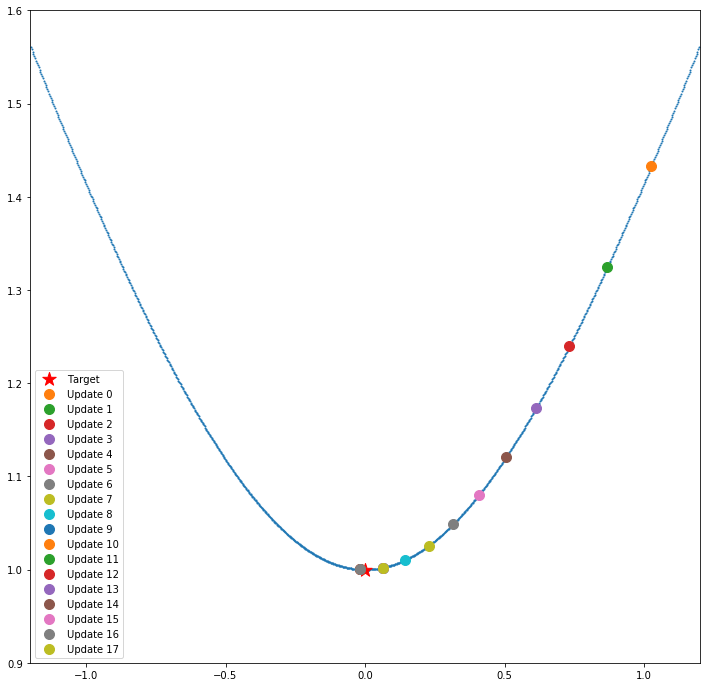

In [10]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[0.9, 1.6])
ax.scatter(x0, x1, s=1)
ax.scatter(target[0], target[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(pt[0], pt[1], marker=markers.MarkerStyle('o',fillstyle="none"), s=100, label="Update {}".format(i))
ax.legend()

## Test with spherical coordinates

Text(0.3,0.2,'$\\theta$')

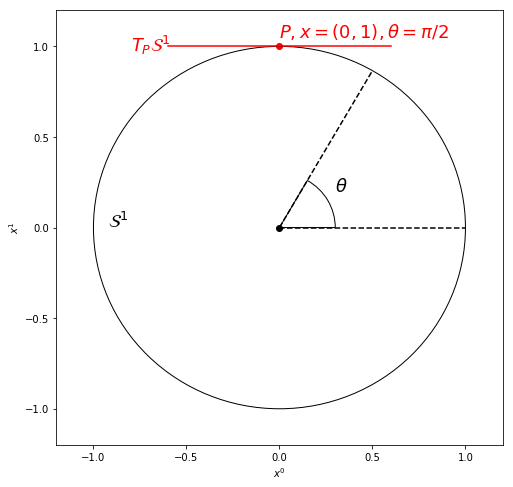

In [11]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.add_line(lines.Line2D([-0.6, 0.6], [1., 1.], color="r", linestyle="-"))
ax.add_line(lines.Line2D([0., 1.], [0., 0.], color="k", linestyle="--"))
ax.add_line(lines.Line2D([0., 0.5], [0., 0.5*np.sqrt(3)], color="k", linestyle="--"))
wedge = patches.Wedge((0., 0), 0.3, 0, 60, fill=False)
ax.add_artist(wedge)
ax.scatter([0.],[0.], color="k")
ax.scatter([0.],[1.], color='r')
ax.annotate(r"$P, x=(0, 1),\theta=\pi/2$", xy=(0, 1), xytext=(0, 1.05), fontsize=18, color='r')
ax.annotate(r"$T_P\mathcal{S}^1$", xy=(-0.7, 1), xytext=(-0.8, 0.97), fontsize=18, color='r')
ax.annotate(r"$\mathcal{S}^1$", xy=(-0.7, 1), xytext=(-0.92, 0.), fontsize=18, color='k')
ax.annotate(r"$\theta$", xy=(0.2, 0.2), xytext=(0.3, 0.2), fontsize=18, color='k')

In [12]:
target2 = np.array([0., -1.])
initial_pt2 = np.array([1., 0])
updated_pts = [initial_pt2]
for i in range(1,6):
    updated_pts.append(
        gradient_descent(updated_pts[i-1], 
                         target2, 
                         error_differential_eucl, 
                         geometry="spherical", 
                         learning_rate=0.3
                        )

    )
print(updated_pts)

u = [1. 0.], v = [ 0. -1.], u.v = 0.0
coefficient*2*u*metric.dot(v)= -1*2*[1. 0.]*[[1. 0.]
 [0. 1.]].dot([ 0. -1.])
step = [-0.  0.]
point_on_manifold = [1. 0.], displacement = [-0.  0.]
xp_norm = 0.0, xx_norm = 1.0
projection on tangent space =  [-0.  0.]
u = [nan nan], v = [ 0. -1.], u.v = nan
coefficient*2*u*metric.dot(v)= nan*2*[nan nan]*[[1. 0.]
 [0. 1.]].dot([ 0. -1.])
step = [nan nan]
point_on_manifold = [nan nan], displacement = [nan nan]
xp_norm = nan, xx_norm = nan
projection on tangent space =  [nan nan]
u = [nan nan], v = [ 0. -1.], u.v = nan
coefficient*2*u*metric.dot(v)= nan*2*[nan nan]*[[1. 0.]
 [0. 1.]].dot([ 0. -1.])
step = [nan nan]
point_on_manifold = [nan nan], displacement = [nan nan]
xp_norm = nan, xx_norm = nan
projection on tangent space =  [nan nan]
u = [nan nan], v = [ 0. -1.], u.v = nan
coefficient*2*u*metric.dot(v)= nan*2*[nan nan]*[[1. 0.]
 [0. 1.]].dot([ 0. -1.])
step = [nan nan]
point_on_manifold = [nan nan], displacement = [nan nan]
xp_norm = nan, xx_nor

/Users/david/Work/ASOS/GeometryTests/geometry.py:40: RuntimeWarning: invalid value encountered in double_scalars
  return np.cos(norm_v_tan)*point_on_manifold + (np.sin(norm_v_tan)/norm_v_tan)*v_tan


Big problems, since directly over sphere is an (unstable) equilibrium

In [13]:
target2 = np.array([0., -1.])
initial_pt2 = np.array([np.cos(0.99*np.pi), np.sin(0.99*np.pi)])
updated_pts = [initial_pt2]
for i in range(1,6):
    updated_pts.append(
        gradient_descent(updated_pts[i-1], 
                         target2, 
                         error_differential_eucl, 
                         geometry="spherical", 
                         learning_rate=0.3
                        )

    )
print(updated_pts)

u = [-0.99950656  0.03141076], v = [ 0. -1.], u.v = -0.03141075907812824
coefficient*2*u*metric.dot(v)= -1*2*[-0.99950656  0.03141076]*[[1. 0.]
 [0. 1.]].dot([ 0. -1.])
step = [0.         0.06285253]
point_on_manifold = [-0.99950656  0.03141076], displacement = [0.         0.06285253]
xp_norm = 0.0019742457428257275, xx_norm = 1.0
projection on tangent space =  [0.00197327 0.06279052]
u = [-0.99873711  0.05024122], v = [ 0. -1.], u.v = -0.05024122162090024
coefficient*2*u*metric.dot(v)= -1.001*2*[-0.99873711  0.05024122]*[[1. 0.]
 [0. 1.]].dot([ 0. -1.])
step = [0.        0.1006095]
point_on_manifold = [-0.99873711  0.05024122], displacement = [0.        0.1006095]
xp_norm = 0.0050547442738741715, xx_norm = 1.0
projection on tangent space =  [0.00504836 0.10035555]
u = [-0.99676909  0.0803205 ], v = [ 0. -1.], u.v = -0.08032050021744792
coefficient*2*u*metric.dot(v)= -1.003*2*[-0.99676909  0.0803205 ]*[[1. 0.]
 [0. 1.]].dot([ 0. -1.])
step = [0.        0.1611617]
point_on_manifold = [-

In [14]:
metric = np.eye(2)
metric[-1, -1] = -1
print()